## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        #[[x, y], [x, y], ...]   ==>[[x, x], [y, y], ...]
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys) + 5.

In [20]:
xs, ys = load_data('train.txt')
print(xs.dtype, xs.shape)
print(ys.dtype, ys.shape)
print(xs[:10])
print(ys[:10])

float64 (300,)
float64 (300,)
[ 2.65  4.7  14.25 22.1  10.55  6.5   4.1  24.65 24.4  22.8 ]
[ 9.06609  6.70023 22.23092 26.77409 12.84291 12.14536  6.64517 28.25737
 27.39327 25.62952]


## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [63]:
def identity_basis(x):
    # shape(x) = [N]
    # shape(ret) = [N, 1]
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    '''shape(x) [N]'''
    '''shape(ret) = [N, feature_num]'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    collect = [x]
    for i in range(2, feature_num+1):
        collect.append(x**i)   #[x, x**2, x**3, x**4, ...]
    ret = np.concatenate(collect, axis=1)
    
    return ret

def gaussian_basis(x, feature_num=20):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    
    def N(x, u, sig):
        aa = -(((x-u)/sig)**2)/2
        bb = np.exp(aa)
        return bb
    
    us = np.linspace(0, 25, feature_num)
    collect = []
    for u in us:
        collect.append(np.expand_dims(N(x, u, us[1]-us[0]), axis=1)) #shape = [(N, 1), ...]
    ret = np.concatenate(collect, axis=1) # [n, feat]
    return ret

def gaussian_basis_1(x, feature_num=20):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    '''shape(x) = [N]'''
    us = np.linspace(0, 25, feature_num) # shape = [feature_num]
    sig = us[1]-us[0]
    x_exp = np.expand_dims(x, axis=1)  # shape = [N, 1]
    ret =np.exp(-(((x_exp - us)/sig)**2)/2)   # shape = [N, feature_num]
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

In [72]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    shape(x_train) = [N]
    shape(phi0) = [N, 1]
    shape(y_train) = [N]
    """
    basis_func = gaussian_basis_1
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) # shape = [N, 1]
    phi1 = basis_func(x_train)   # shape = [N, 1]
    phi = np.concatenate([phi0, phi1], axis=1)  # shape = [N, 2]
    
    '''
     phi = [[2.65,     1]
            [4.70000,  1]
            [14.25000, 1]
            [22.10000, 1]
            [10.55000, 1]
            ...
           ]
    '''
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w''' w*
    #==========
    def Ngrad_func(w, x, y):
        return np.dot(x.T, (y-np.dot(x, w)))
    
    w = np.zeros(phi.shape[1])
    for i in range(10000):
        w = w + 0.001 * Ngrad_func(w, phi, y_train)
    
#     a = np.dot(phi.T, phi)
#     a_inv = np.linalg.inv(a)
    
#     b = np.dot(phi.T, y_train)
#     w = np.dot(a_inv, b)
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)   # y = wTx +b ==> wTphi
        return y
        pass

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

训练集预测值与真实值的标准差：0.2
预测值与真实值的标准差：0.2


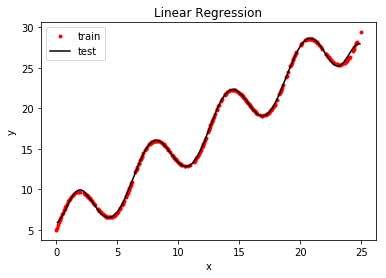

In [73]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train)

    y_train_pred = f(x_train)
    std = evaluate(y_train, y_train_pred)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
#     plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()